In [25]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import numpy as np
import scipy.stats as st

In [11]:
data_path = "Resources/Test_Data.csv"

data_df = pd.read_csv(data_path)
data_df.head()

,abbr_state,positive,death,hospitalized,totalTestResults,Date,Total Landed Flights
0,AK,12644,68,0,547140.0,1/22/2020,374
1,AL,174528,2805,19330,1273523.0,1/22/2020,557
2,AR,101596,1751,6526,1242752.0,1/22/2020,813
3,AS,0,0,0,1616.0,1/22/2020,581
4,AZ,233912,5854,20820,1657389.0,1/22/2020,758


In [12]:
#group Total state metrics (no date layer)
total_df = data_df.groupby(['abbr_state'], as_index=False)[['Total Landed Flights','positive','death','hospitalized','totalTestResults']].sum()
total_df.head()

,abbr_state,Total Landed Flights,positive,death,hospitalized,totalTestResults
0,AK,129614,706508,5024,688,41150068.0
1,AL,125717,14269493,266838,1586834,114415037.0
2,AR,132177,7326589,105069,497325,90942024.0
3,AS,130811,0,0,0,165279.0
4,AZ,130130,22960768,561998,2138581,146199352.0


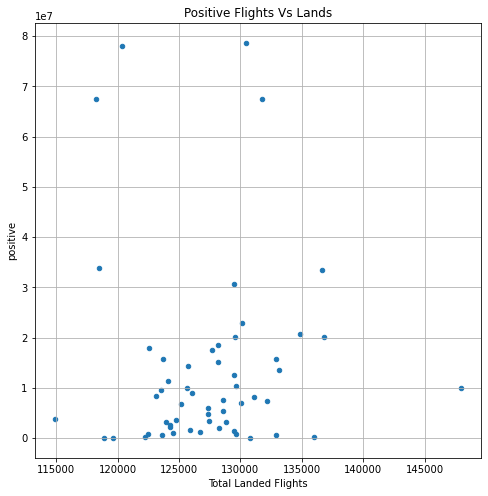

In [13]:
# ScatterPlots
total_df.plot(kind="scatter", x="Total Landed Flights", y="positive", grid=True, figsize=(8,8),
              title="Positive Flights Vs Lands")
plt.show()


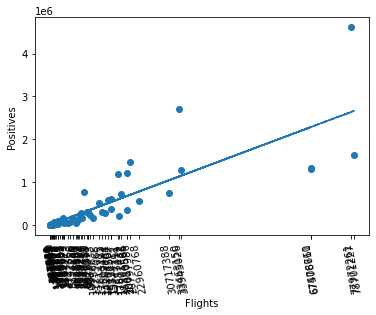

In [21]:
fl_slope, fl_int, fl_r, fl_p, fl_std_err = stats.linregress(flights, positive)
fl_fit = fl_slope * flights + fl_int

flights = total_df.iloc[:,2]
positive = total_df.iloc[:,3]
plt.scatter(flights,positive)
plt.plot(flights,fl_fit,"--")
plt.xticks(flights, rotation=100)
plt.xlabel('Flights')
plt.ylabel('Positives')
plt.show()


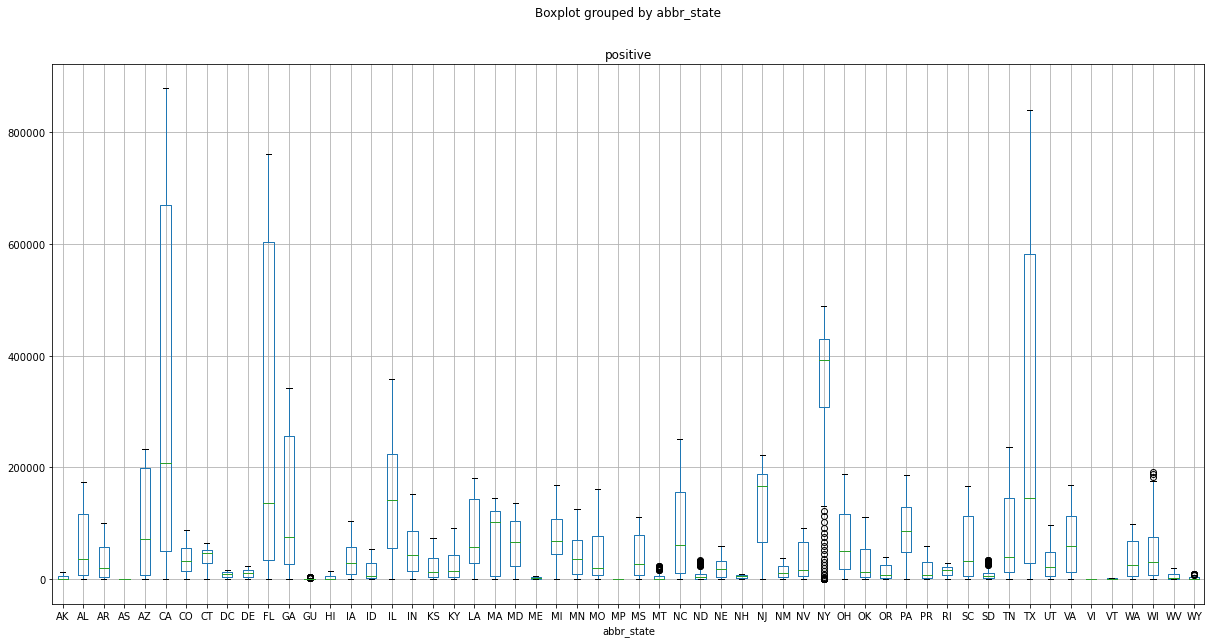

In [22]:
#BoxPlot Positive rates by state
data_df.boxplot("positive", by="abbr_state", figsize=(20, 10))

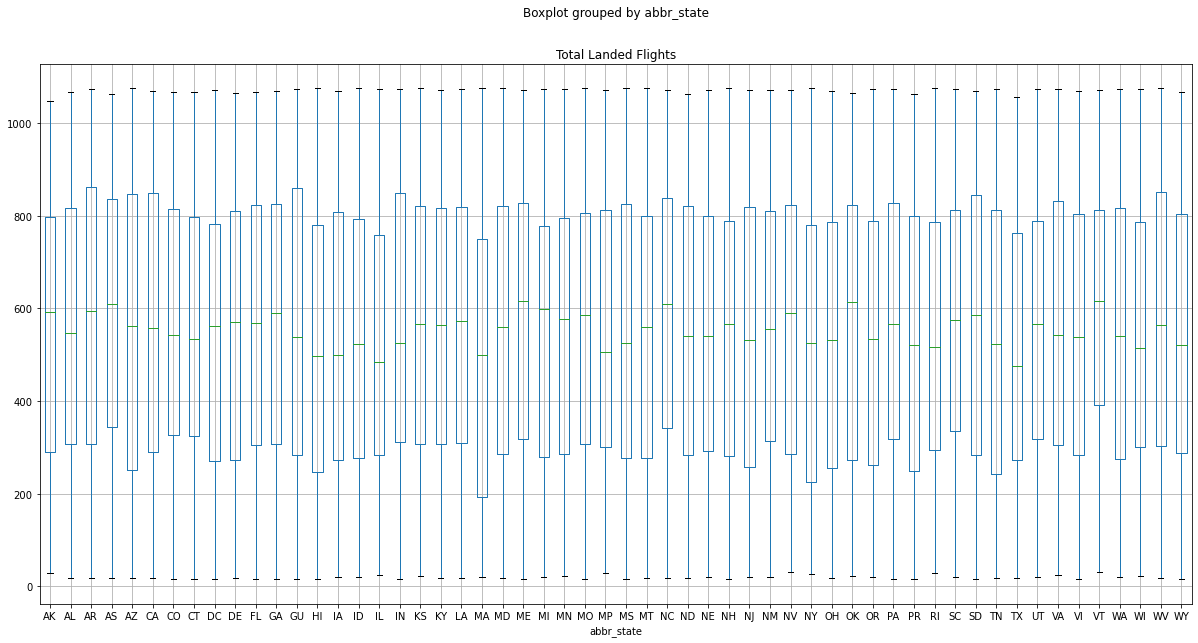

In [23]:
#BoxPlot flights by state
data_df.boxplot("Total Landed Flights", by="abbr_state", figsize=(20, 10))

In [31]:
data_desc = data_df.corr()
data_desc.unstack().sort_values()


Total Landed Flights  death                  -0.017895
death                 Total Landed Flights   -0.017895
hospitalized          Total Landed Flights   -0.012338
Total Landed Flights  hospitalized           -0.012338
                      positive               -0.002671
positive              Total Landed Flights   -0.002671
Total Landed Flights  totalTestResults       -0.002098
totalTestResults      Total Landed Flights   -0.002098
                      hospitalized            0.484185
hospitalized          totalTestResults        0.484185
                      positive                0.547908
positive              hospitalized            0.547908
totalTestResults      death                   0.764960
death                 totalTestResults        0.764960
hospitalized          death                   0.785724
death                 hospitalized            0.785724
                      positive                0.808300
positive              death                   0.808300
          

In [30]:
print(f"The correlation coefficient between Positives and flights is {round(st.pearsonr(flights,positive)[0],2)}")

The correlation coefficient between Positives and flights is 0.81
